In [1]:
%load_ext autoreload
%autoreload 2

## Imports

In [2]:
import torch
import torchvision
from torchvision import transforms
# from datasets import load_from_disk
# from transformers import AutoTokenizer

import os
import itertools
import json
import numpy as np
from tqdm import tqdm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/pbs.2746138.pbsha.ib.sockeye/matplotlib-5gp60r7a because the default path (/home/willib/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
from torch_spotlight.datasets import *
from torch_spotlight.utils import *
from torch_spotlight.plot_utils import *

setupPlots()

In [4]:
import wilds
from wilds import get_dataset
from wilds.common.data_loaders import get_train_loader, get_eval_loader
from wilds.common.grouper import CombinatorialGrouper

In [5]:
import csv

In [6]:
os.environ['DATA_DIR'] = os.environ['TMPDIR']

In [7]:
data_dir = os.environ['DATA_DIR'] + '/data'
iwild_dir = os.path.join(data_dir, 'iwildcam_v2.0')

# IWild_Train

## Dataset

In [8]:
dataset = get_dataset(dataset='iwildcam', root_dir=data_dir)
iwild_train = dataset.get_subset('train')
iwild_val_id = dataset.get_subset('id_val')
iwild_val_ood = dataset.get_subset('val')
iwild_test_id = dataset.get_subset('id_test')
iwild_test_ood = dataset.get_subset('test')

In [10]:
image = iwild_train[111][0]

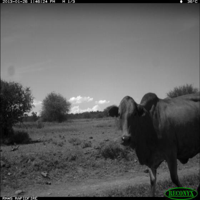

In [11]:
image.resize((200,200))   #any size 

In [9]:
animal_name_dict = {}
with open(iwild_dir + '/categories.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    for row in csv_reader:
        animal_name_dict[int(row[0])] = row[2]
print(animal_name_dict)

{0: 'empty', 1: 'tayassu pecari', 2: 'dasyprocta punctata', 3: 'cuniculus paca', 4: 'puma concolor', 5: 'tapirus terrestris', 6: 'pecari tajacu', 7: 'mazama americana', 8: 'leopardus pardalis', 9: 'geotrygon montana', 10: 'nasua nasua', 11: 'dasypus novemcinctus', 12: 'eira barbara', 13: 'didelphis marsupialis', 14: 'procyon cancrivorus', 15: 'panthera onca', 16: 'myrmecophaga tridactyla', 17: 'tinamus major', 18: 'sylvilagus brasiliensis', 19: 'puma yagouaroundi', 20: 'leopardus wiedii', 21: 'mazama gouazoubira', 22: 'philander opossum', 23: 'capra aegagrus', 24: 'bos taurus', 25: 'ovis aries', 26: 'canis lupus', 27: 'lepus saxatilis', 28: 'papio anubis', 29: 'genetta genetta', 30: 'tragelaphus scriptus', 31: 'herpestes sanguineus', 32: 'loxodonta africana', 33: 'cricetomys gambianus', 34: 'raphicerus campestris', 35: 'hyaena hyaena', 36: 'aepyceros melampus', 37: 'crocuta crocuta', 38: 'caracal caracal', 39: 'equus ferus', 40: 'panthera leo', 41: 'tragelaphus oryx', 42: 'kobus ellips

## Model outputs / Loss

In [10]:
# pwd is '/scratch/st-kevinlb-1/will/jupyter/spotlight'
inf_results = loadResults(
    os.path.join(os.getcwd(),'inference_results/iwild_train_resnet.pkl'),
)
losses = inf_results.losses

In [80]:
# pwd is '/scratch/st-kevinlb-1/will/jupyter/spotlight'
inf_results = loadResults(
    os.path.join(os.getcwd(),'inference_results/iwild_val_resnet_id.pkl'),
)
losses = inf_results.losses

In [85]:
# pwd is '/scratch/st-kevinlb-1/will/jupyter/spotlight'
inf_results = loadResults(
    os.path.join(os.getcwd(),'inference_results/iwild_val_resnet_ood.pkl'),
)
losses = inf_results.losses

In [90]:
# pwd is '/scratch/st-kevinlb-1/will/jupyter/spotlight'
inf_results = loadResults(
    os.path.join(os.getcwd(),'inference_results/iwild_test_resnet_id.pkl'),
)
losses = inf_results.losses

In [95]:
# pwd is '/scratch/st-kevinlb-1/will/jupyter/spotlight'
inf_results = loadResults(
    os.path.join(os.getcwd(),'inference_results/iwild_test_resnet_ood.pkl'),
)
losses = inf_results.losses

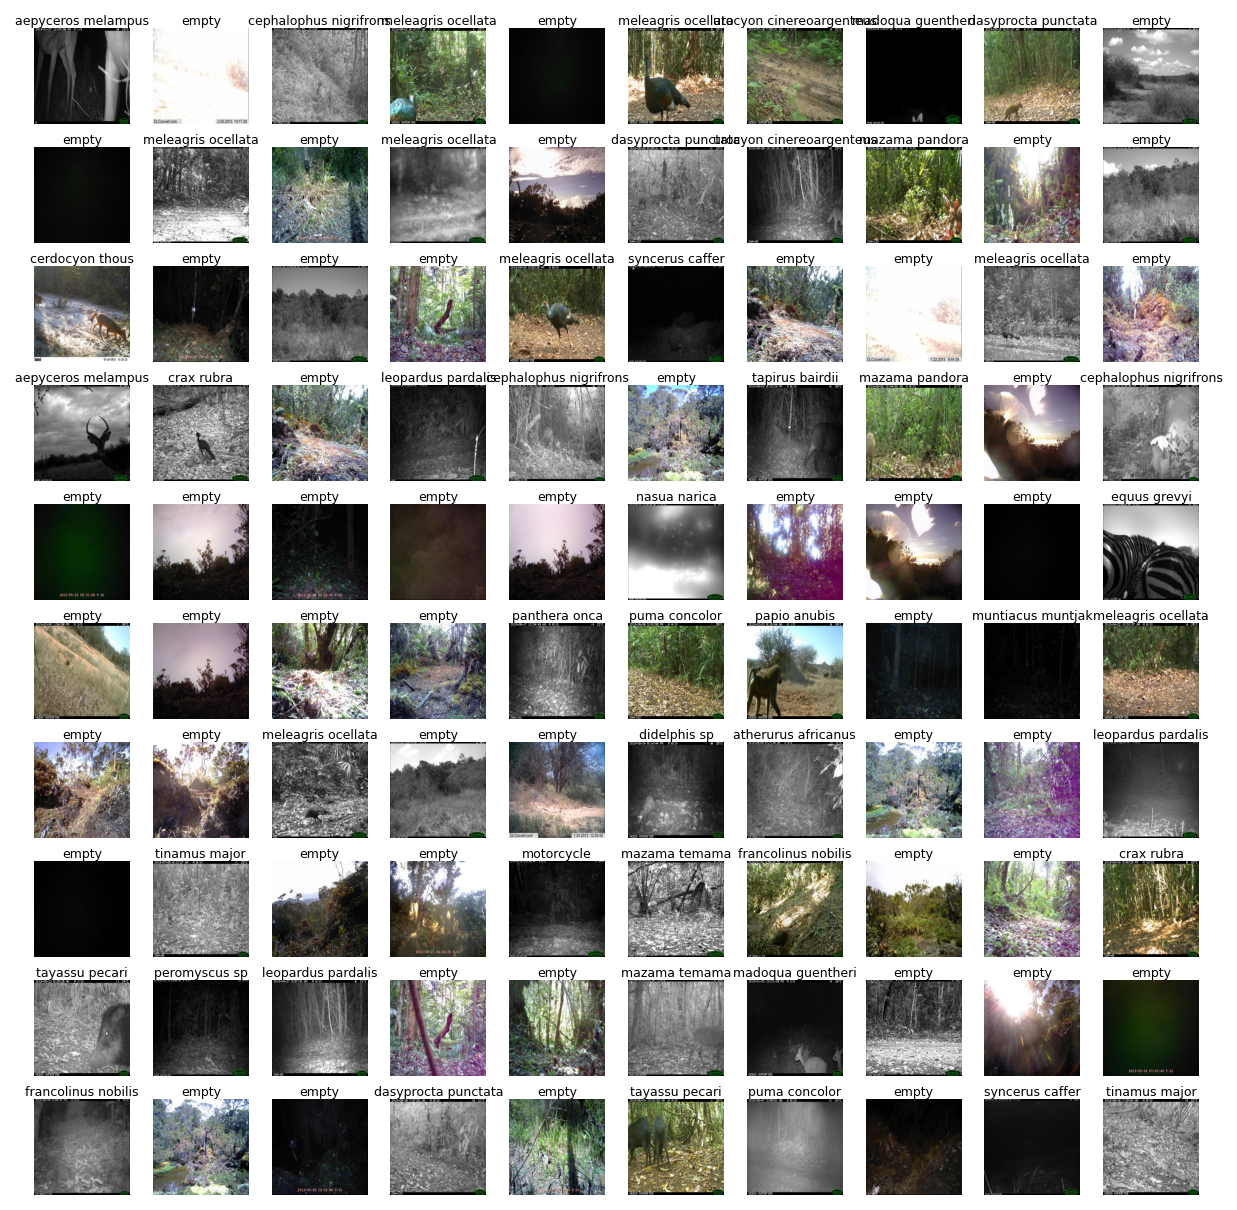

In [120]:
loss_idx = losses.argsort()[::-1]
examples = [iwild_train[i] for i in loss_idx[:100]]
example_losses = [losses[i] for i in loss_idx[:100]]
titles = [animal_name_dict.get(torch.IntTensor.item(example[1])) for example in examples]
images = [torch.tensor(np.array(example[0].resize((200,200)))).permute((2,0,1)) for example in examples]

# titles = ['%.2f' % loss for loss in example_losses]
plotImageGrid((8, 8), (10, 10), images, titles)
plt.show()

## Spotlights

In [32]:
spotlights = {}
for count in np.arange(1, 6):
    spotlights[count] = loadResults(f'spotlight_results/iwild_train_resnet_0.01_spherical_{count}.pkl')

In [23]:
spotlights = {}
for count in np.arange(1, 6):
    spotlights[count] = loadResults(f'spotlight_results/iwild_val_resnet_id_0.01_spherical_{count}.pkl')

In [16]:
spotlights = {}
for count in np.arange(1, 6):
    spotlights[count] = loadResults(f'spotlight_results/iwild_val_resnet_ood_0.01_spherical_{count}.pkl')

In [18]:
spotlights = {}
for count in np.arange(1, 6):
    spotlights[count] = loadResults(f'spotlight_results/iwild_test_resnet_id_0.01_spherical_{count}.pkl')

In [20]:
spotlights = {}
for count in np.arange(1, 6):
    spotlights[count] = loadResults(f'spotlight_results/iwild_test_resnet_ood_0.01_spherical_{count}.pkl')

## Test spotlight component

In [40]:
print(spotlights[1].unnormalized_weights)
print(spotlights[1].spotlight_mean)
print(spotlights[1].spotlight_precision)

[6.9343019e-04 4.3410622e-04 7.5406032e-03 ... 3.5100999e-01 5.5296805e-05
 6.3559863e-05]
tensor([0.4319, 0.2209, 0.2633,  ..., 0.5102, 0.0585, 0.2796], device='cuda:0',
       requires_grad=True)
tensor([[0.0538, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0538, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0538,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0538, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0538, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0538]],
       device='cuda:0', requires_grad=True)


## Analysis spotlight

In [11]:
grouper = CombinatorialGrouper(dataset, ['location'])
def plotHighWeightImages(spotlight, figname=None):
    weights = spotlight[0]
    weight_idx = weights.argsort()[::-1]
    examples = [iwild_train[i] for i in weight_idx[:18]]
    example_losses = [losses[i] for i in weight_idx[:18]]
    images = [torch.tensor(np.array(example[0])).permute((2,0,1)) for example in examples]
    # titles = [animal_name_dict.get(torch.IntTensor.item(example[1])) for example in examples]
    titles = [torch.IntTensor.item(grouper.metadata_to_group(example[2].view(1,9))) for example in examples]
    print(titles)
    plotImageGrid((5.5, 1.4), (8, 2), images, titles)
    plt.show()

[265, 300, 160, 147, 168, 35, 54, 236, 31, 243, 43, 285, 34, 221, 139, 13, 249, 168]


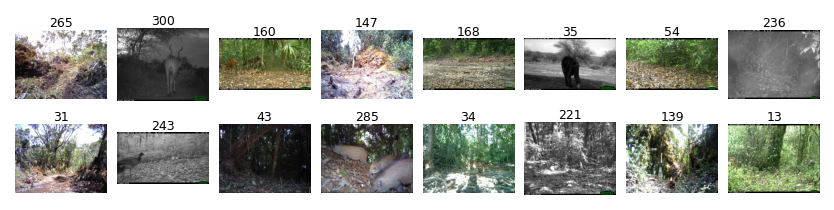

[33, 147, 294, 2, 265, 75, 255, 26, 236, 205, 158, 63, 258, 292, 221, 54, 93, 186]


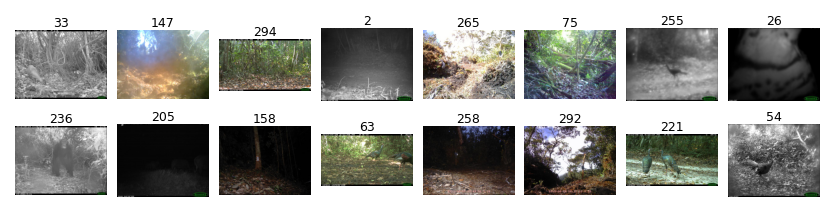

[26, 295, 181, 53, 235, 11, 158, 179, 113, 259, 93, 281, 5, 243, 5, 11, 265, 43]


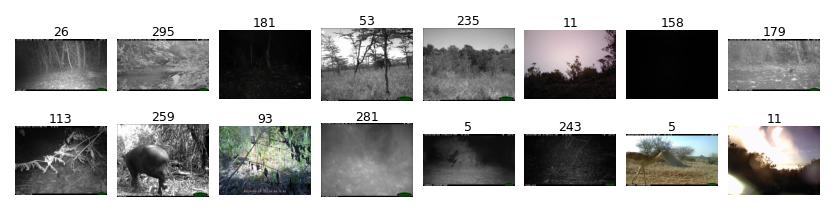

[243, 242, 147, 283, 157, 168, 140, 286, 11, 308, 308, 118, 295, 26, 286, 46, 179, 316]


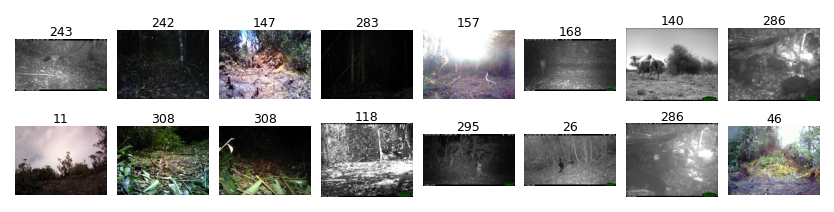

[139, 262, 194, 296, 31, 221, 158, 11, 140, 11, 230, 221, 195, 121, 147, 194, 255, 185]


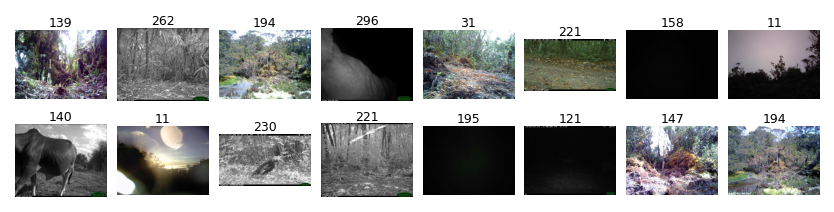

In [44]:
plotHighWeightImages(spotlights[1], 'iwild_train_1.png')
plotHighWeightImages(spotlights[2], 'iwild_train_2.png')
plotHighWeightImages(spotlights[3], 'iwild_train_3.png')
plotHighWeightImages(spotlights[4], 'iwild_train_4.png')
plotHighWeightImages(spotlights[5], 'iwild_train_5.png')

{101: 121.80462, 120: 105.937744, 311: 37.485123, 270: 40.405075, 289: 18.634232, 127: 4.4209385, 78: 0.5343411, 95: 13.016346, 301: 7.7870045, 73: 0.845619, 237: 2.0374186, 188: 27.834282, 58: 3.2329857, 184: 0.8285145, 245: 0.9709922, 69: 1.0115191, 59: 0.27683374, 62: 0.13234513, 24: 0.08629364, 7: 0.09206292, 191: 0.19719192, 56: 0.031610884, 241: 0.05131205, 115: 0.02878061, 187: 0.07384001, 125: 0.01437075, 169: 0.014235715, 49: 0.013652498}


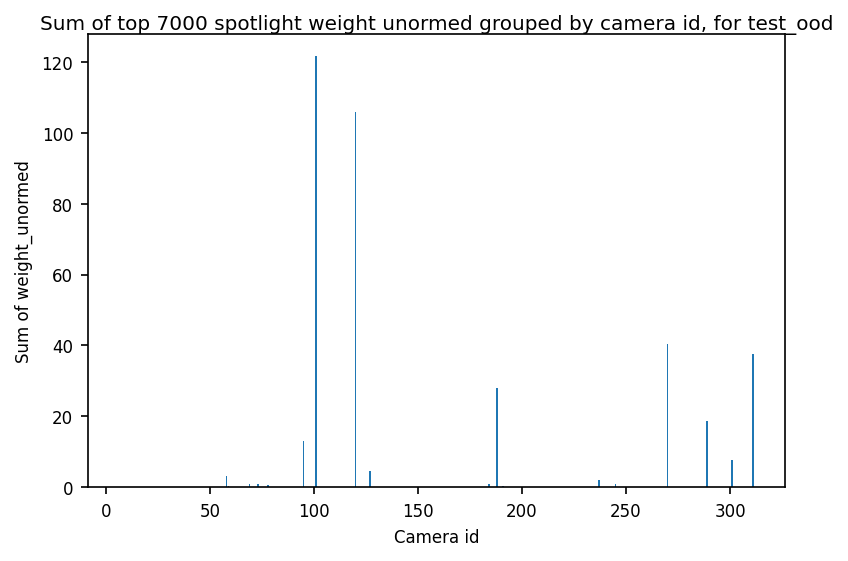

In [97]:
grouper = CombinatorialGrouper(dataset, ['location'])
def computeSumOfWeightsUnormed(spotlight, dataset):
    weights_unormed = spotlight.unnormalized_weights
    weight_unormed_idx = weights_unormed.argsort()[::-1]
    examples = [dataset[i] for i in weight_unormed_idx[:7000]]
    locations = [torch.IntTensor.item(grouper.metadata_to_group(example[2].view(1,9))) for example in examples]
    examples_weights_unormed = weights_unormed[weight_unormed_idx[:7000]]
    weights_unormed_dict = {}
    for i in range(len(locations)):
        if locations[i] in weights_unormed_dict:
            weights_unormed_dict[locations[i]] += examples_weights_unormed[i]
        else:
            weights_unormed_dict[locations[i]] = examples_weights_unormed[i]
    print(weights_unormed_dict)
    plt.bar(weights_unormed_dict.keys(), weights_unormed_dict.values())
    plt.title("Sum of top 7000 spotlight weight unormed grouped by camera id, for test_ood")
    plt.xlabel("Camera id")
    plt.ylabel("Sum of weight_unormed")
    plt.savefig('/scratch/st-kevinlb-1/will/jupyter/spotlight/picture/test_ood_unweight')

computeSumOfWeightsUnormed(spotlights[1], iwild_test_ood)

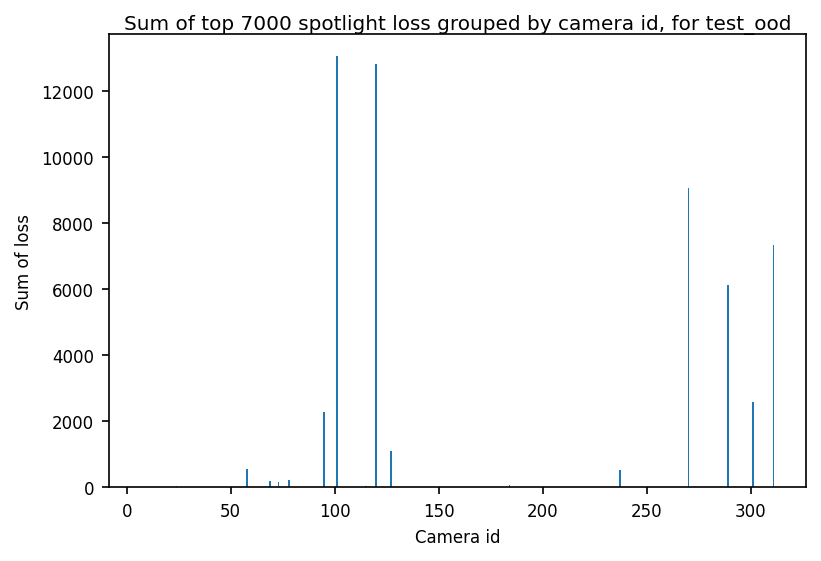

In [98]:
grouper = CombinatorialGrouper(dataset, ['location'])
def computeHighestLossByCamera(spotlight, dataset):
    weights_unormed = spotlight.unnormalized_weights
    weight_unormed_idx = weights_unormed.argsort()[::-1]
    examples = [dataset[i] for i in weight_unormed_idx[:7000]]
    locations = [torch.IntTensor.item(grouper.metadata_to_group(example[2].view(1,9))) for example in examples]
    highest_losses = [losses[i] for i in weight_unormed_idx[:7000]]
    loss_dict = {}
    for i in range(len(locations)):
        if locations[i] in loss_dict:
            loss_dict[locations[i]] += highest_losses[i]
        else:
            loss_dict[locations[i]] = highest_losses[i]   
    plt.bar(loss_dict.keys(), loss_dict.values())
    plt.title("Sum of top 7000 spotlight loss grouped by camera id, for test_ood")
    plt.xlabel("Camera id")
    plt.ylabel("Sum of loss")
    plt.savefig('/scratch/st-kevinlb-1/will/jupyter/spotlight/picture/test_ood_loss')
    
computeHighestLossByCamera(spotlights[1],iwild_test_ood)

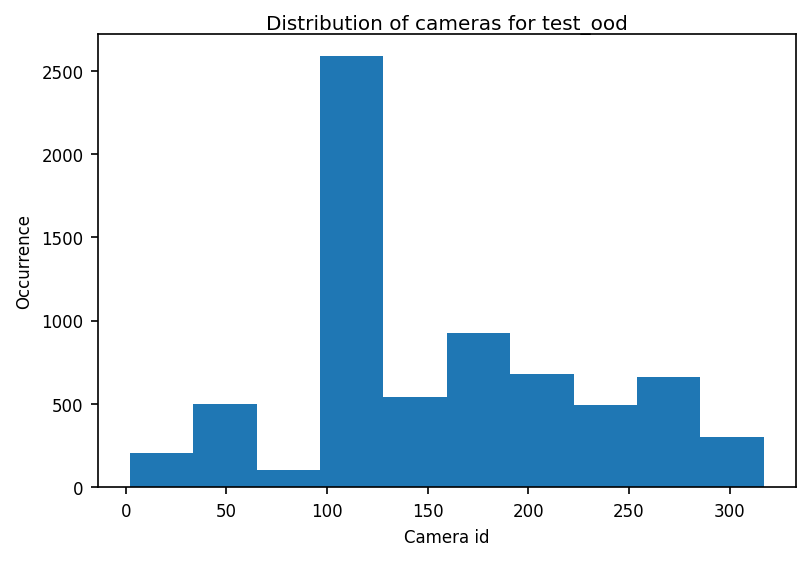

In [99]:
grouper = CombinatorialGrouper(dataset, ['location'])
def findDistributionOfCameras(spotlight, subset):
    weights_unormed = spotlight.unnormalized_weights
    weight_unormed_idx = weights_unormed.argsort()[::-1]
    examples = [dataset[i] for i in weight_unormed_idx[:7000]]
    locations = [torch.IntTensor.item(grouper.metadata_to_group(example[2].view(1,9))) for example in examples]
    plt.hist(locations)
    plt.title("Distribution of cameras for test_ood")
    plt.xlabel("Camera id")
    plt.ylabel("Occurrence")
    plt.savefig('/scratch/st-kevinlb-1/will/jupyter/spotlight/picture/test_ood_distribution')

findDistributionOfCameras(spotlights[1], iwild_test_ood)

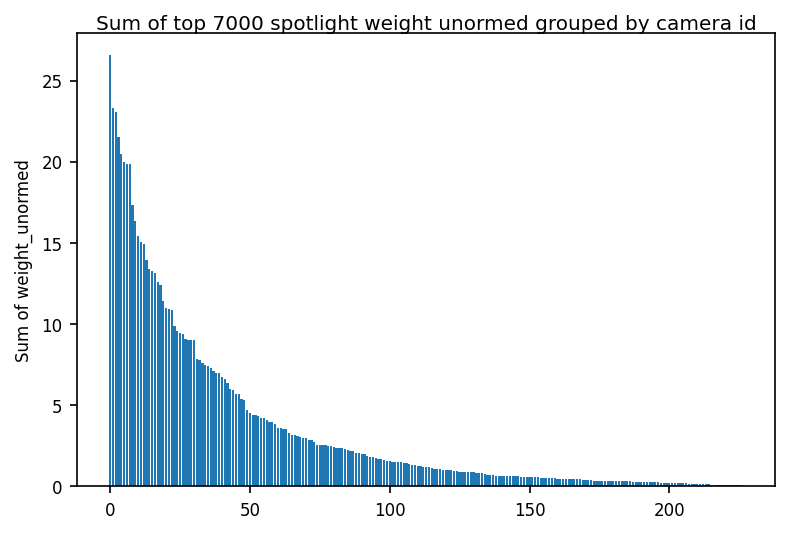

In [33]:
computeSumOfWeightsUnormed(spotlights[1], iwild_train)

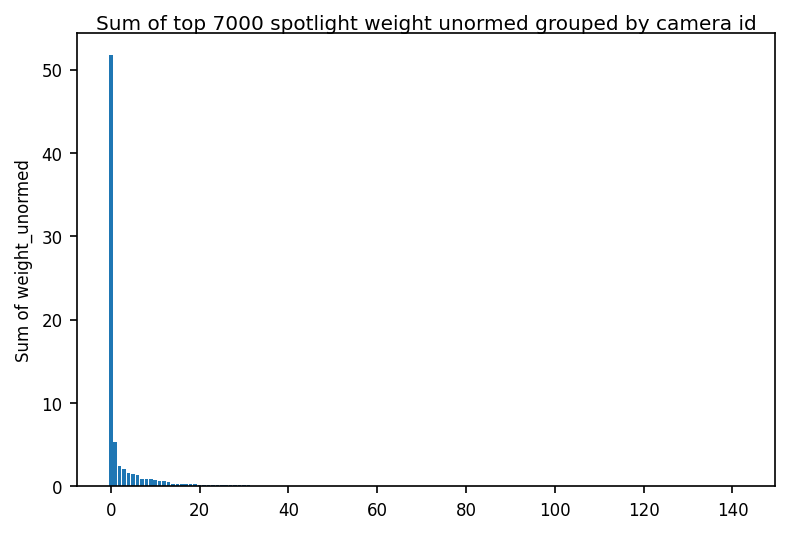

In [18]:
computeSumOfWeightsUnormed(spotlights[1], iwild_val_id)

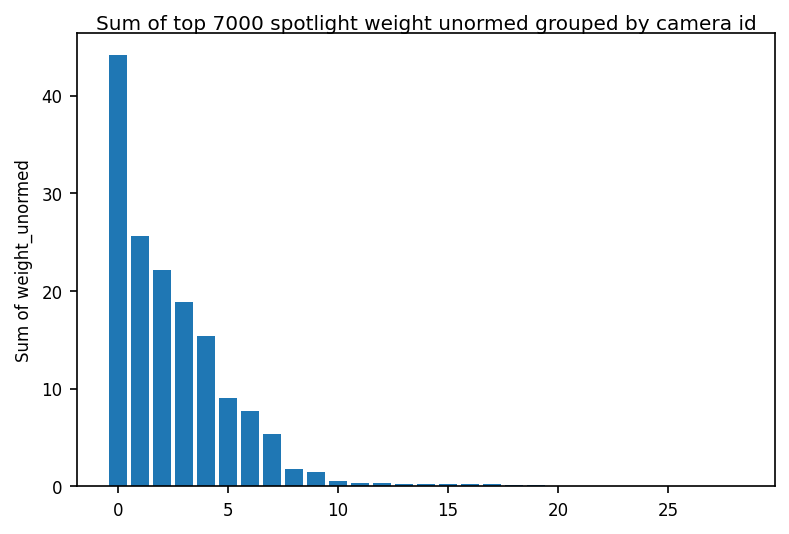

In [22]:
computeSumOfWeightsUnormed(spotlights[1], iwild_val_ood)

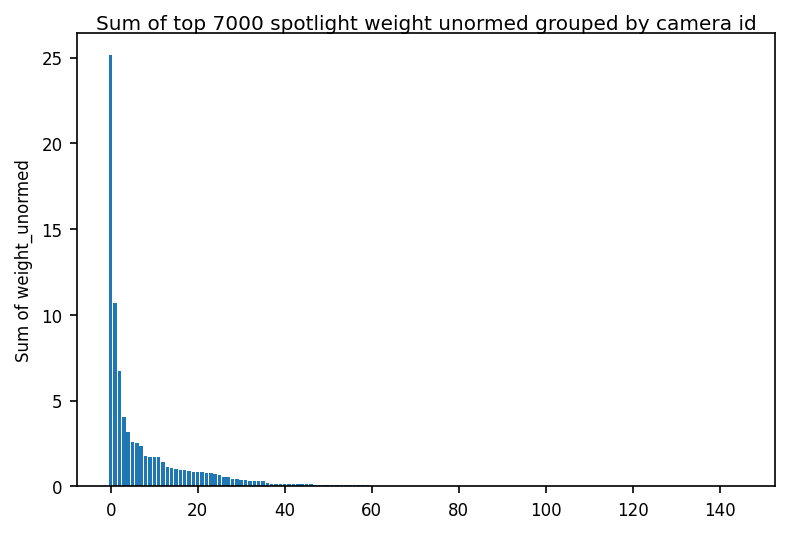

In [26]:
computeSumOfWeightsUnormed(spotlights[1], iwild_test_id)

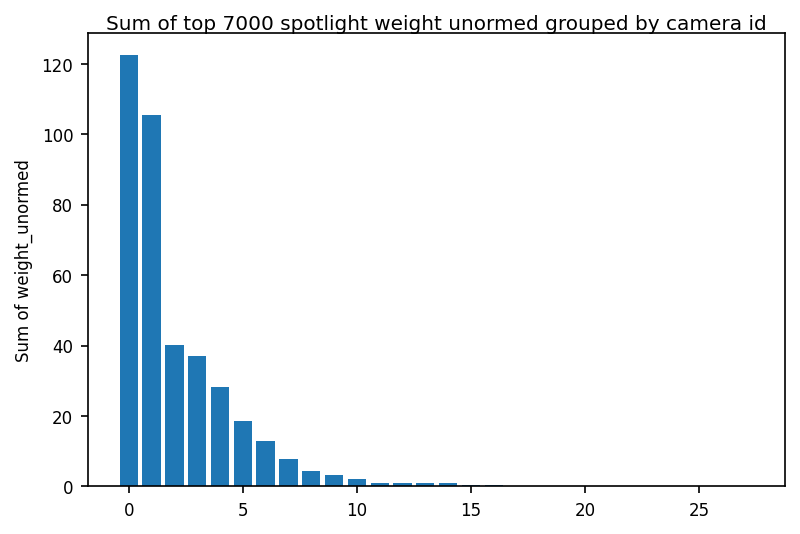

In [30]:
computeSumOfWeightsUnormed(spotlights[1], iwild_test_ood)

In [57]:
spotlights = {}
for count in np.arange(1, 6):
    spotlights[count] = loadSpotlightResults(f'spotlight_results/iwild_train_resnet_0.01_spherical_{count}.pkl')

[285, 34, 103, 286, 300, 230, 160, 194, 295, 230, 185, 249, 230, 228, 46, 102, 93, 93]


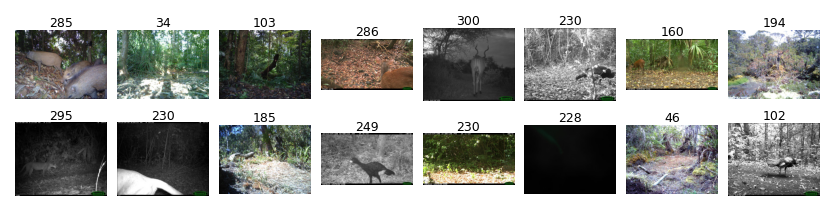

[307, 265, 181, 121, 63, 262, 168, 243, 147, 230, 205, 262, 181, 221, 151, 230, 103, 63]


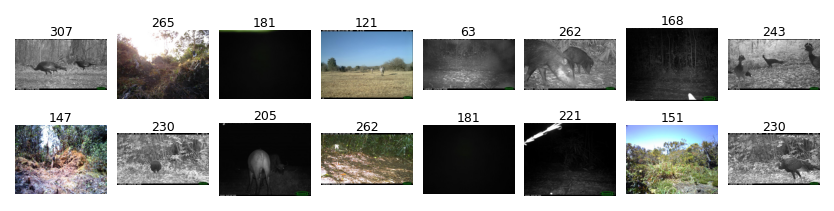

[181, 295, 26, 179, 53, 93, 158, 113, 11, 259, 235, 5, 281, 243, 84, 230, 103, 294]


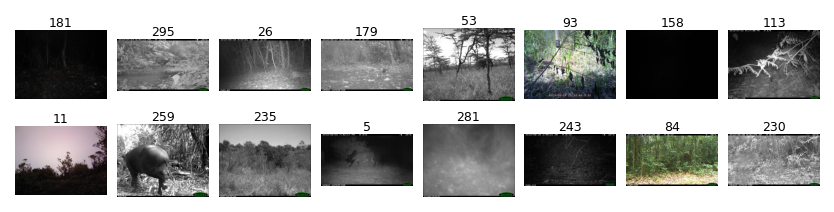

[103, 308, 159, 307, 286, 179, 242, 316, 11, 93, 255, 243, 179, 1, 6, 48, 294, 140]


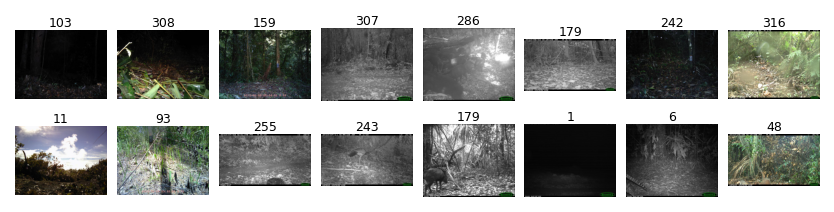

[139, 262, 158, 296, 140, 2, 194, 11, 185, 307, 293, 194, 281, 307, 5, 151, 144, 194]


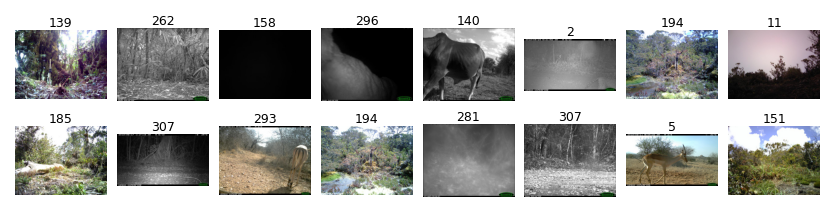

In [58]:
plotHighWeightImages(spotlights[1], 'iwild_train_1.png')
plotHighWeightImages(spotlights[2], 'iwild_train_2.png')
plotHighWeightImages(spotlights[3], 'iwild_train_3.png')
plotHighWeightImages(spotlights[4], 'iwild_train_4.png')
plotHighWeightImages(spotlights[5], 'iwild_train_5.png')

In [29]:
spotlights = {}
for count in np.arange(1, 6):
    spotlights[count] = loadSpotlightResults(f'spotlight_results/iwild_train_resnet_0.005_spherical_{count}.pkl')

(129809,)
[194, 286, 228, 103, 285, 34, 230, 185, 295, 230, 88, 230, 46, 140, 243, 93, 274, 160]


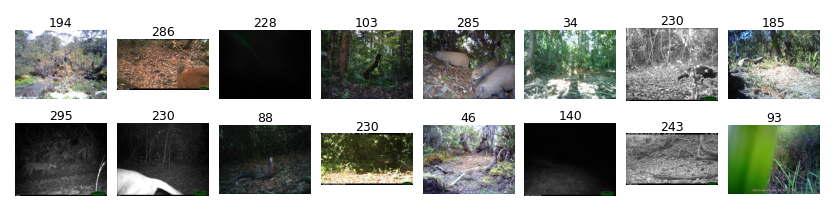

(129809,)
[236, 307, 63, 11, 119, 6, 8, 221, 139, 173, 295, 147, 262, 162, 194, 26, 230, 46]


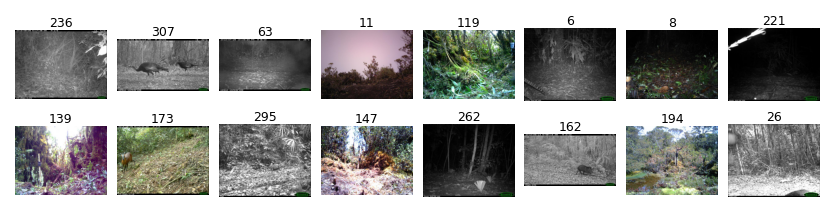

(129809,)
[179, 181, 294, 230, 295, 93, 84, 26, 158, 53, 170, 181, 307, 294, 113, 117, 46, 221]


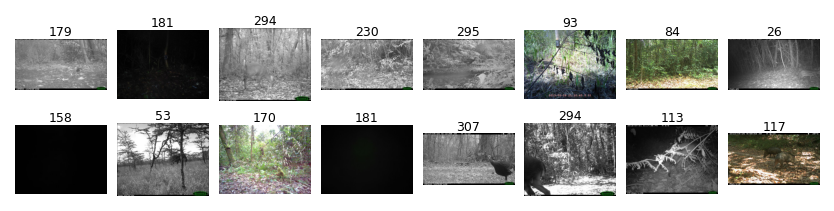

(129809,)
[265, 202, 310, 304, 265, 142, 97, 168, 158, 168, 71, 93, 147, 307, 117, 23, 5, 139]


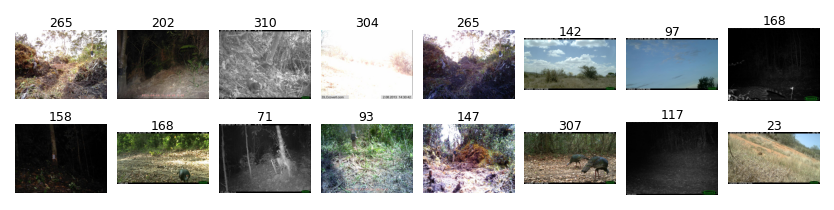

(129809,)
[242, 243, 11, 147, 295, 286, 157, 46, 294, 276, 283, 46, 197, 168, 307, 236, 286, 296]


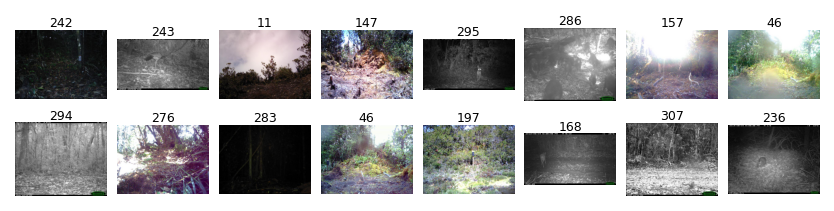

In [30]:
plotHighWeightImages(spotlights[1], 'iwild_train_1.png')
plotHighWeightImages(spotlights[2], 'iwild_train_2.png')
plotHighWeightImages(spotlights[3], 'iwild_train_3.png')
plotHighWeightImages(spotlights[4], 'iwild_train_4.png')
plotHighWeightImages(spotlights[5], 'iwild_train_5.png')

In [31]:
spotlights = {}
for count in np.arange(1, 6):
    spotlights[count] = loadSpotlightResults(f'spotlight_results/iwild_train_resnet_0.002_spherical_{count}.pkl')

(129809,)
[228, 2, 194, 253, 265, 177, 88, 196, 251, 13, 253, 307, 243, 54, 230, 286, 157, 141]


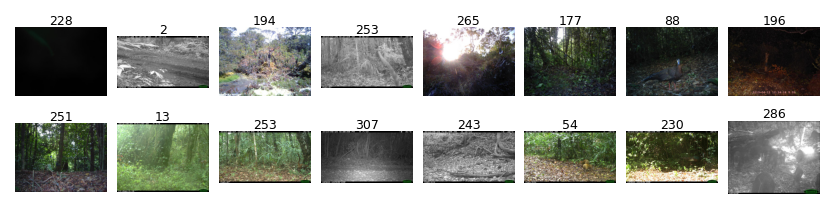

(129809,)
[255, 159, 48, 139, 307, 316, 6, 297, 228, 74, 6, 221, 43, 12, 236, 236, 132, 119]


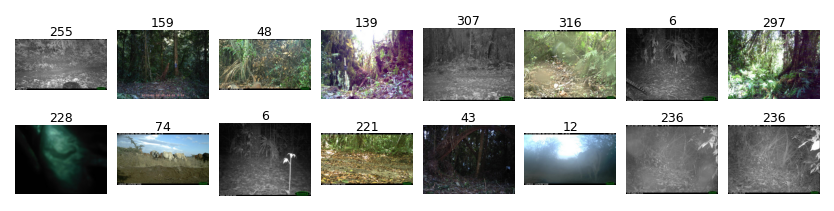

(129809,)
[294, 181, 46, 221, 296, 255, 158, 103, 39, 38, 139, 221, 179, 11, 307, 84, 230, 304]


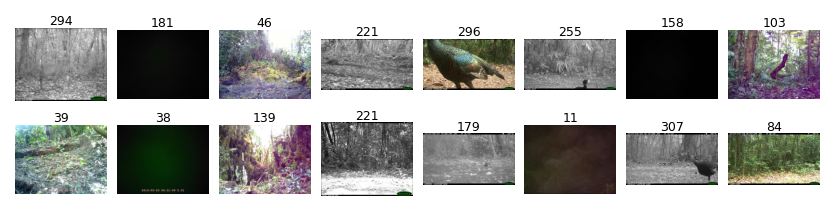

(129809,)
[202, 300, 129, 6, 253, 117, 5, 17, 26, 296, 223, 117, 139, 230, 296, 123, 228, 116]


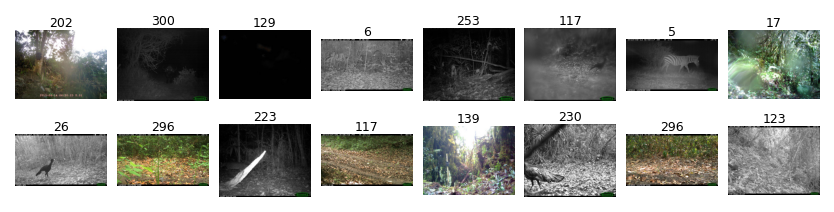

(129809,)
[147, 296, 230, 137, 151, 304, 307, 31, 11, 259, 13, 164, 296, 123, 103, 48, 26, 230]


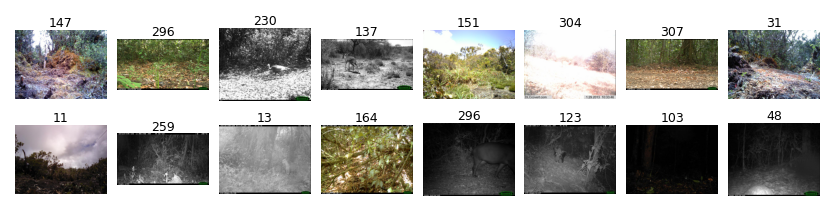

In [32]:
plotHighWeightImages(spotlights[1], 'iwild_train_1.png')
plotHighWeightImages(spotlights[2], 'iwild_train_2.png')
plotHighWeightImages(spotlights[3], 'iwild_train_3.png')
plotHighWeightImages(spotlights[4], 'iwild_train_4.png')
plotHighWeightImages(spotlights[5], 'iwild_train_5.png')

In [63]:
spotlights = {}
for count in np.arange(1, 6):
    spotlights[count] = loadSpotlightResults(f'spotlight_results/iwild_train_resnet_0.001_spherical_{count}.pkl')

[253, 13, 11, 46, 11, 141, 221, 2, 228, 253, 26, 307, 6, 117, 157, 226, 218, 72]


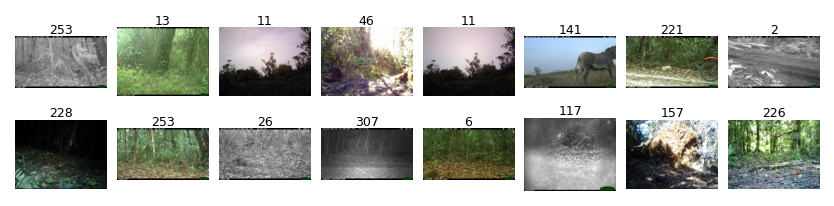

[43, 236, 255, 46, 33, 307, 168, 159, 48, 147, 316, 228, 8, 12, 6, 265, 35, 221]


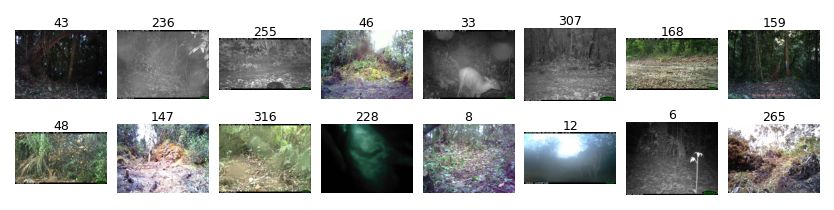

[158, 38, 31, 11, 19, 54, 262, 230, 121, 296, 46, 54, 296, 235, 295, 203, 26, 304]


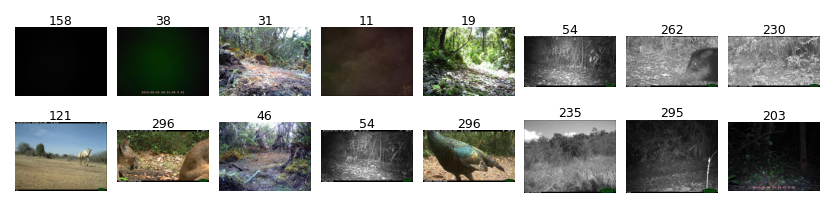

[85, 63, 255, 264, 90, 160, 54, 265, 223, 307, 123, 2, 13, 304, 230, 5, 103, 221]


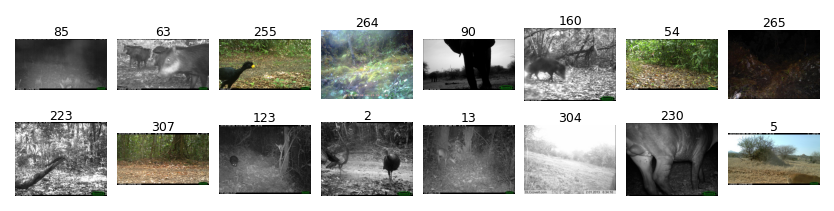

[139, 235, 139, 202, 147, 186, 265, 54, 322, 9, 44, 157, 129, 23, 102, 232, 265, 63]


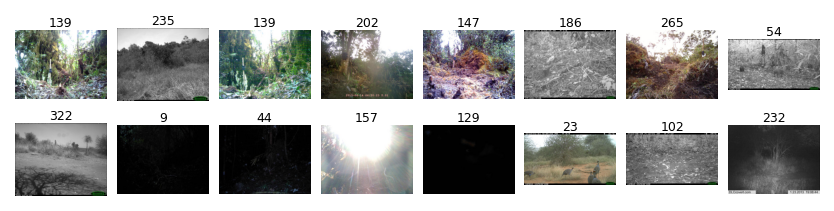

In [64]:
plotHighWeightImages(spotlights[1], 'iwild_train_1.png')
plotHighWeightImages(spotlights[2], 'iwild_train_2.png')
plotHighWeightImages(spotlights[3], 'iwild_train_3.png')
plotHighWeightImages(spotlights[4], 'iwild_train_4.png')
plotHighWeightImages(spotlights[5], 'iwild_train_5.png')

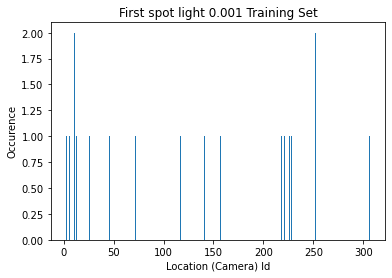

In [4]:
plt.hist([253, 13, 11, 46, 11, 141, 221, 2, 228, 253, 26, 307, 6, 117, 157, 226, 218, 72],bins = 300)
plt.xlabel('Location (Camera) Id')
plt.ylabel("Occurence")
plt.title("First spot light 0.001 Training Set")
plt.show()

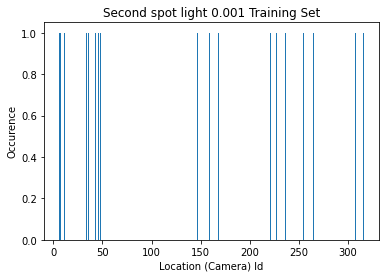

In [5]:
plt.hist([43, 236, 255, 46, 33, 307, 168, 159, 48, 147, 316, 228, 8, 12, 6, 265, 35, 221],bins = 300)
plt.xlabel('Location (Camera) Id')
plt.ylabel("Occurence")
plt.title("Second spot light 0.001 Training Set")
plt.show()

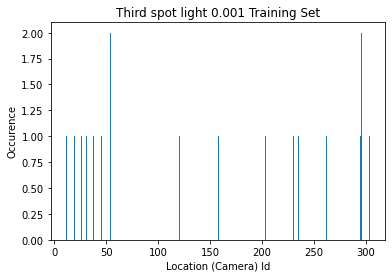

In [6]:
plt.hist([158, 38, 31, 11, 19, 54, 262, 230, 121, 296, 46, 54, 296, 235, 295, 203, 26, 304],bins = 300)
plt.xlabel('Location (Camera) Id')
plt.ylabel("Occurence")
plt.title("Third spot light 0.001 Training Set")
plt.show()

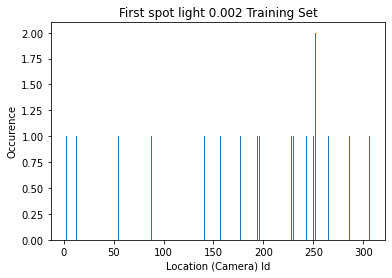

In [7]:
plt.hist([228, 2, 194, 253, 265, 177, 88, 196, 251, 13, 253, 307, 243, 54, 230, 286, 157, 141],bins = 300)
plt.xlabel('Location (Camera) Id')
plt.ylabel("Occurence")
plt.title("First spot light 0.002 Training Set")
plt.show()

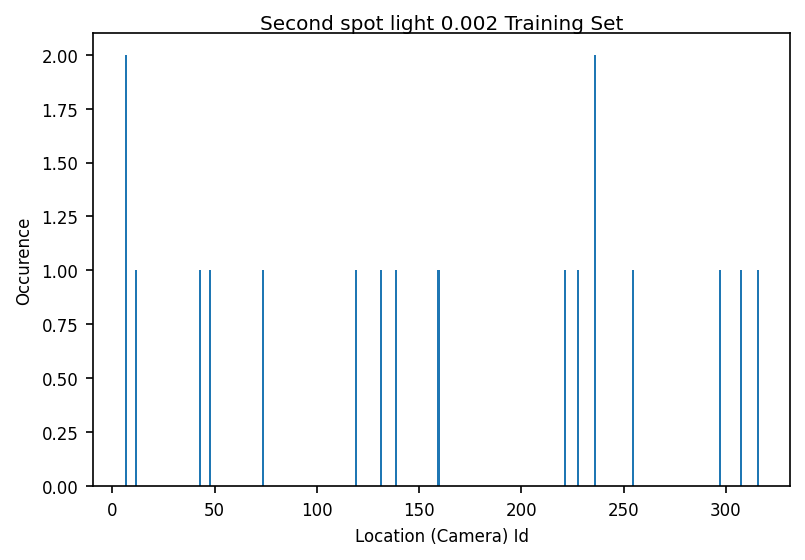

In [33]:
plt.hist([255, 159, 48, 139, 307, 316, 6, 297, 228, 74, 6, 221, 43, 12, 236, 236, 132, 119],bins = 300)
plt.xlabel('Location (Camera) Id')
plt.ylabel("Occurence")
plt.title("Second spot light 0.002 Training Set")
plt.show()

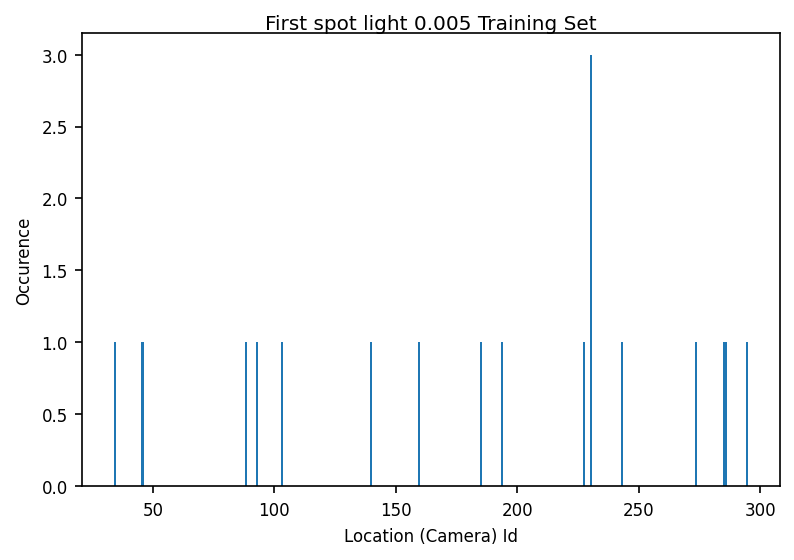

In [34]:
plt.hist([194, 286, 228, 103, 285, 34, 230, 185, 295, 230, 88, 230, 46, 140, 243, 93, 274, 160],bins = 300)
plt.xlabel('Location (Camera) Id')
plt.ylabel("Occurence")
plt.title("First spot light 0.005 Training Set")
plt.show()

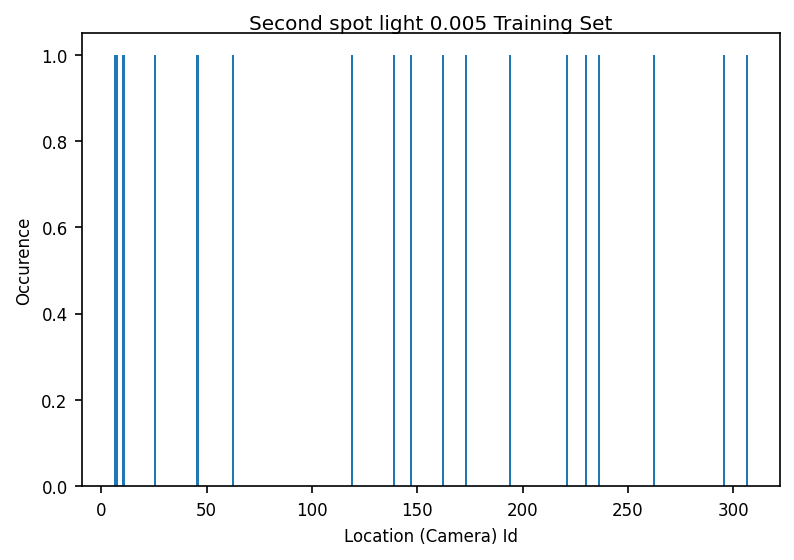

In [35]:
plt.hist([236, 307, 63, 11, 119, 6, 8, 221, 139, 173, 295, 147, 262, 162, 194, 26, 230, 46],bins = 300)
plt.xlabel('Location (Camera) Id')
plt.ylabel("Occurence")
plt.title("Second spot light 0.005 Training Set")
plt.show()

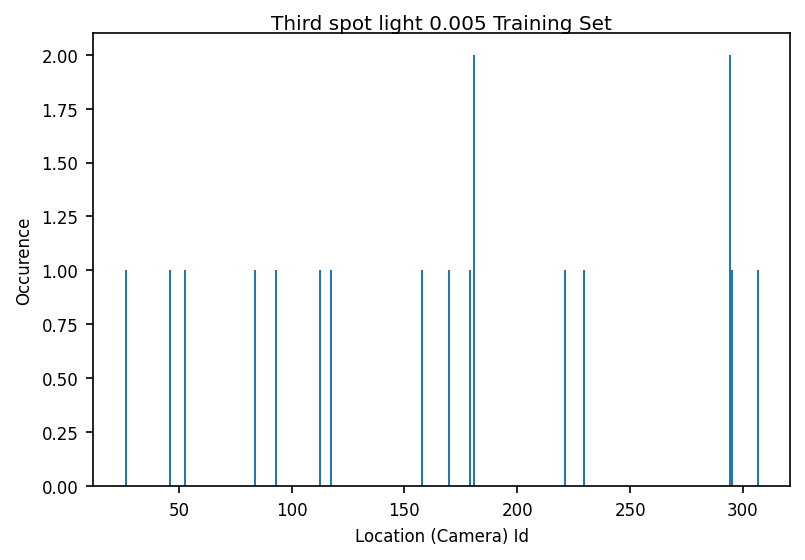

In [36]:
plt.hist([179, 181, 294, 230, 295, 93, 84, 26, 158, 53, 170, 181, 307, 294, 113, 117, 46, 221],bins = 300)
plt.xlabel('Location (Camera) Id')
plt.ylabel("Occurence")
plt.title("Third spot light 0.005 Training Set")
plt.show()

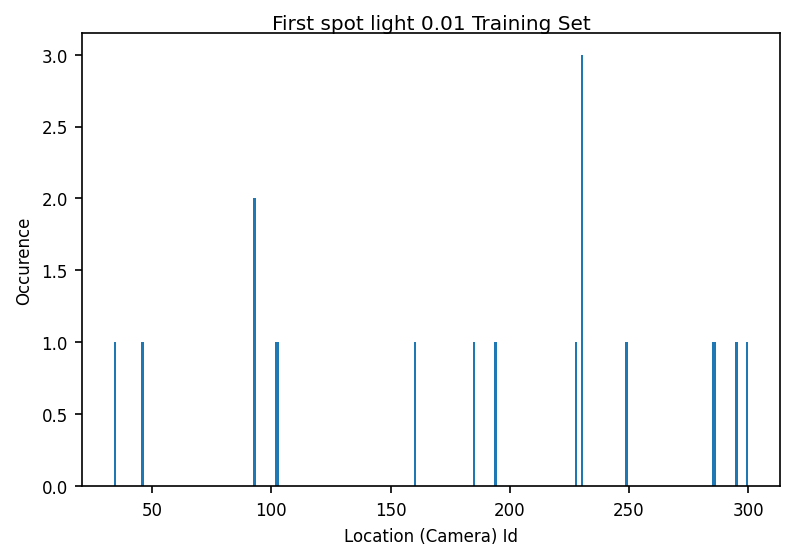

In [37]:
plt.hist([285, 34, 103, 286, 300, 230, 160, 194, 295, 230, 185, 249, 230, 228, 46, 102, 93, 93],bins = 300)
plt.xlabel('Location (Camera) Id')
plt.ylabel("Occurence")
plt.title("First spot light 0.01 Training Set")
plt.show()

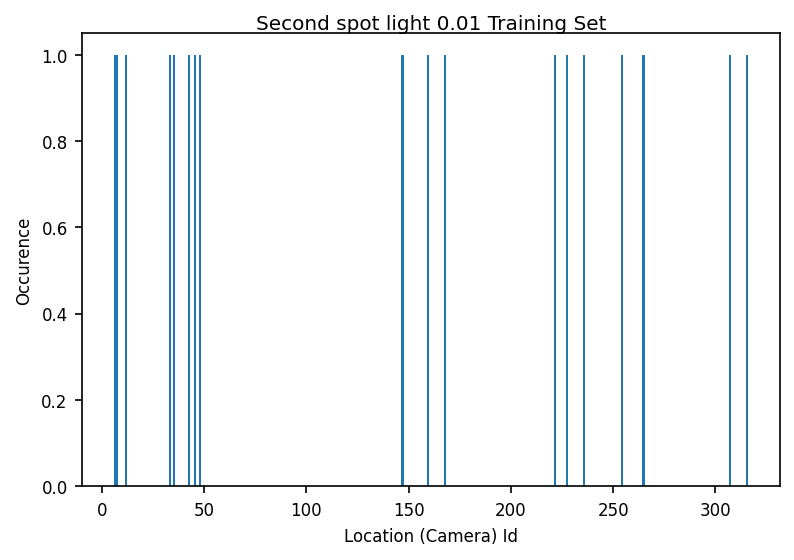

In [38]:
plt.hist([43, 236, 255, 46, 33, 307, 168, 159, 48, 147, 316, 228, 8, 12, 6, 265, 35, 221],bins = 300)
plt.xlabel('Location (Camera) Id')
plt.ylabel("Occurence")
plt.title("Second spot light 0.01 Training Set")
plt.show()

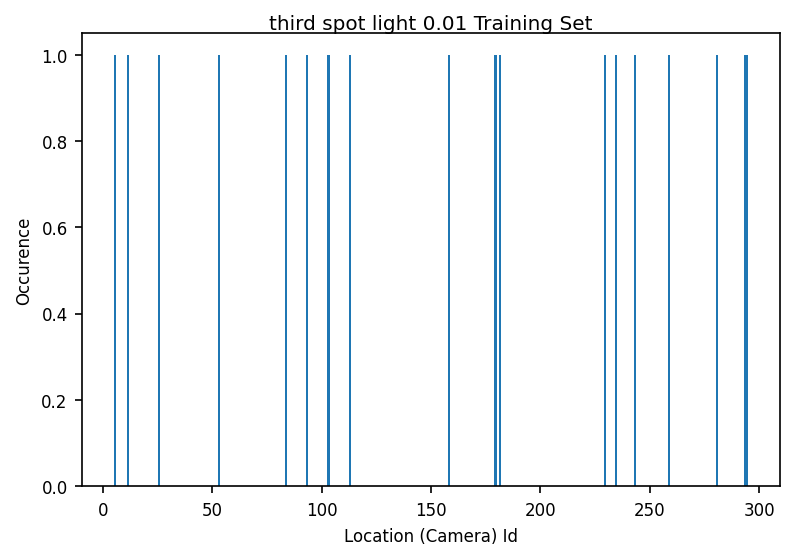

In [39]:
plt.hist([181, 295, 26, 179, 53, 93, 158, 113, 11, 259, 235, 5, 281, 243, 84, 230, 103, 294],bins = 300)
plt.xlabel('Location (Camera) Id')
plt.ylabel("Occurence")
plt.title("third spot light 0.01 Training Set")
plt.show()

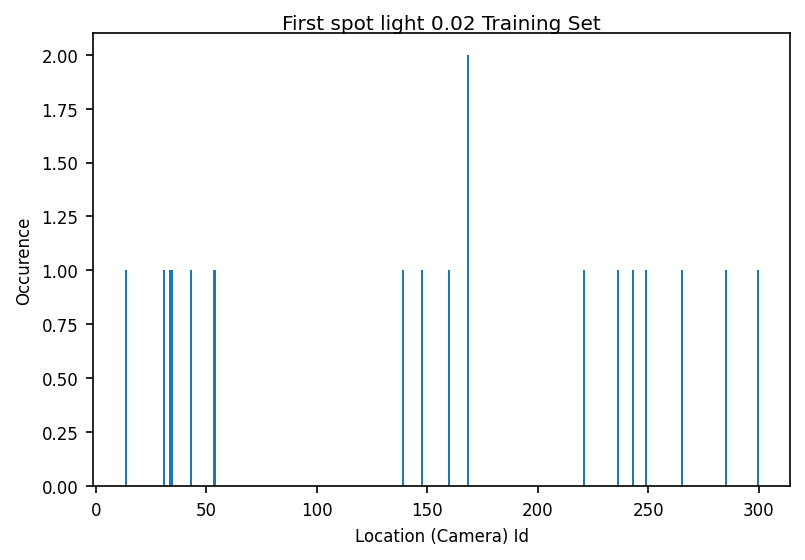

In [40]:
plt.hist([265, 300, 160, 147, 168, 35, 54, 236, 31, 243, 43, 285, 34, 221, 139, 13, 249, 168],bins = 300)
plt.xlabel('Location (Camera) Id')
plt.ylabel("Occurence")
plt.title("First spot light 0.02 Training Set")
plt.show()

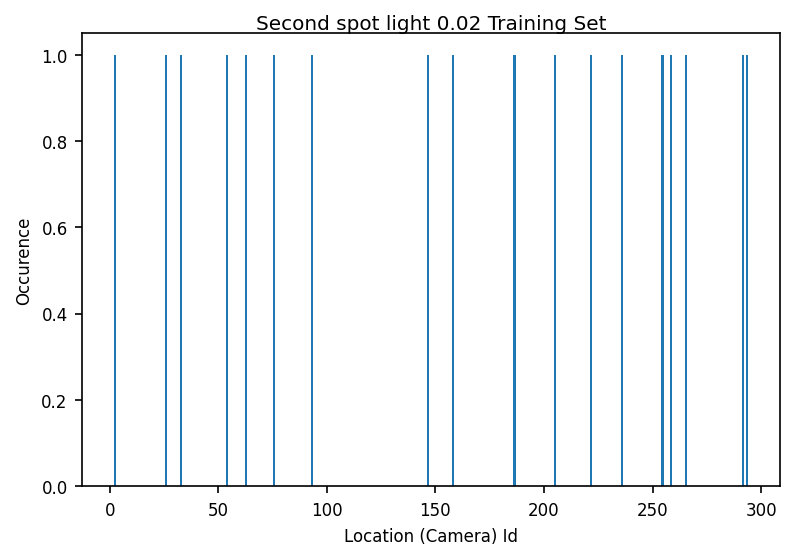

In [41]:
plt.hist([33, 147, 294, 2, 265, 75, 255, 26, 236, 205, 158, 63, 258, 292, 221, 54, 93, 186],bins = 300)
plt.xlabel('Location (Camera) Id')
plt.ylabel("Occurence")
plt.title("Second spot light 0.02 Training Set")
plt.show()